### Credit Card Fraud Detections:

1. The main aim of this project is to detect the fraudulent credit card transactions where the fraud cases are rare and is less than 1%.


### Steps used in this Algorithm:

1.   Import all the necessary libraries

2.   Load Credit Card Fraud Dataset

3.   Perform the Data Exploration

4.   Do Data Pre-processing

5.   Handle Imbalance 

6.   Feature Scaling 

7.   Prepare Data 

8.   Isolation Forest 

9.   One-Class SVM

10.  Model Evaluation 

11.  Visualization 

### Step 1:  Import all the necessary libraries

In [940]:
import  numpy              as  np
import  pandas             as  pd
import  matplotlib.pyplot  as  plt
import  seaborn            as  sns

from    sklearn.model_selection  import train_test_split
from    sklearn.preprocessing    import StandardScaler
from    sklearn.ensemble         import IsolationForest
from    sklearn.svm              import OneClassSVM
from    sklearn.metrics          import accuracy_score, confusion_matrix, classification_report

### Step 2:  Load Credit Card Fraud Dataset

In [941]:
df = pd.read_csv("creditcard.csv")

In [942]:
df

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Time,Amount,Class
0,0.496714,-0.678495,0.348286,-1.980572,-0.471858,0.098206,0.078838,0.320152,0.664001,0.960895,...,-0.538522,-1.252631,-1.453030,0.276511,0.554532,-0.141042,-0.746091,167256,50.42,0
1,-0.138264,-0.305499,0.283324,-1.054986,1.012702,-0.064108,0.562897,1.115462,-0.296116,-0.369965,...,2.292061,-0.766660,0.109270,1.043696,1.753721,-0.135331,0.757040,145438,90.25,0
2,0.647689,-0.597381,-0.936520,-0.587028,-0.198187,0.951791,0.341102,-1.505238,-0.066586,-0.579581,...,-1.504112,0.086829,0.485767,0.003883,-0.451468,0.075878,-0.427880,38252,3.55,0
3,1.523030,0.110418,0.579584,0.149669,0.090569,1.532831,-1.277914,1.739606,-0.175382,0.933312,...,1.375205,-0.074921,0.528361,-1.038205,1.320591,0.192559,2.228718,60801,48.79,0
4,-0.234153,1.197179,-1.490083,1.024162,0.717391,0.686847,-0.186220,0.330087,0.514054,-2.731540,...,0.325901,0.463245,0.882367,1.176187,-1.986991,2.256713,-0.113275,65191,18.08,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1.301102,0.387827,-0.577288,1.119651,0.056799,-0.701856,-0.451663,0.940865,1.822031,-0.225225,...,2.840762,0.974288,1.869850,-1.338851,-0.759498,0.725628,0.206138,130814,125.00,0
9996,-1.998345,1.377367,1.444604,0.265034,-0.024923,-1.099044,0.487646,-0.429319,-0.669515,-0.569778,...,-1.944462,-1.173347,0.300467,1.464326,0.870715,0.182154,-1.086843,105875,43.00,0
9997,-0.705317,0.378354,-0.501367,0.616501,0.500085,0.141010,0.367925,-0.468957,-0.296389,0.409185,...,0.185278,-0.870024,-0.685006,0.138331,-0.909329,-0.781879,-0.391059,111762,112.97,0
9998,0.495766,1.713530,-1.892357,0.814624,0.265215,-2.181973,0.527923,-0.003343,0.259596,-0.211092,...,-0.390005,0.463708,-0.045441,-1.428508,0.530631,-0.085409,0.809404,13946,57.11,0


### Step 3: Perform the Data Exploration

In [943]:
### Display the first five rows of the dataset

df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Time,Amount,Class
0,0.496714,-0.678495,0.348286,-1.980572,-0.471858,0.098206,0.078838,0.320152,0.664001,0.960895,...,-0.538522,-1.252631,-1.453030,0.276511,0.554532,-0.141042,-0.746091,167256,50.42,0
1,-0.138264,-0.305499,0.283324,-1.054986,1.012702,-0.064108,0.562897,1.115462,-0.296116,-0.369965,...,2.292061,-0.766660,0.109270,1.043696,1.753721,-0.135331,0.757040,145438,90.25,0
2,0.647689,-0.597381,-0.936520,-0.587028,-0.198187,0.951791,0.341102,-1.505238,-0.066586,-0.579581,...,-1.504112,0.086829,0.485767,0.003883,-0.451468,0.075878,-0.427880,38252,3.55,0
3,1.523030,0.110418,0.579584,0.149669,0.090569,1.532831,-1.277914,1.739606,-0.175382,0.933312,...,1.375205,-0.074921,0.528361,-1.038205,1.320591,0.192559,2.228718,60801,48.79,0
4,-0.234153,1.197179,-1.490083,1.024162,0.717391,0.686847,-0.186220,0.330087,0.514054,-2.731540,...,0.325901,0.463245,0.882367,1.176187,-1.986991,2.256713,-0.113275,65191,18.08,0


In [944]:
### Display the last five rows of the dataset

df.tail()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Time,Amount,Class
9995,1.301102,0.387827,-0.577288,1.119651,0.056799,-0.701856,-0.451663,0.940865,1.822031,-0.225225,...,2.840762,0.974288,1.869850,-1.338851,-0.759498,0.725628,0.206138,130814,125.00,0
9996,-1.998345,1.377367,1.444604,0.265034,-0.024923,-1.099044,0.487646,-0.429319,-0.669515,-0.569778,...,-1.944462,-1.173347,0.300467,1.464326,0.870715,0.182154,-1.086843,105875,43.00,0
9997,-0.705317,0.378354,-0.501367,0.616501,0.500085,0.141010,0.367925,-0.468957,-0.296389,0.409185,...,0.185278,-0.870024,-0.685006,0.138331,-0.909329,-0.781879,-0.391059,111762,112.97,0
9998,0.495766,1.713530,-1.892357,0.814624,0.265215,-2.181973,0.527923,-0.003343,0.259596,-0.211092,...,-0.390005,0.463708,-0.045441,-1.428508,0.530631,-0.085409,0.809404,13946,57.11,0
9999,0.644388,-1.619920,-0.228884,0.355974,1.515811,-0.006398,-1.486038,-0.993488,-0.196422,0.120063,...,-0.530608,-0.755637,0.815195,-2.078596,-0.165453,-0.410700,-0.602350,83011,27.76,0


In [945]:
### Display the columns used in the dataset

df.columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Time', 'Amount',
       'Class'],
      dtype='object')

In [946]:
### Get the total records used in the dataset

print("Length of the dataset is:", len(df))

Length of the dataset is: 10000


In [947]:
### shape of the dataset

df.shape

(10000, 31)

In [948]:
### get the information about the columns used in the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      10000 non-null  float64
 1   V2      10000 non-null  float64
 2   V3      10000 non-null  float64
 3   V4      10000 non-null  float64
 4   V5      10000 non-null  float64
 5   V6      10000 non-null  float64
 6   V7      10000 non-null  float64
 7   V8      10000 non-null  float64
 8   V9      10000 non-null  float64
 9   V10     10000 non-null  float64
 10  V11     10000 non-null  float64
 11  V12     10000 non-null  float64
 12  V13     10000 non-null  float64
 13  V14     10000 non-null  float64
 14  V15     10000 non-null  float64
 15  V16     10000 non-null  float64
 16  V17     10000 non-null  float64
 17  V18     10000 non-null  float64
 18  V19     10000 non-null  float64
 19  V20     10000 non-null  float64
 20  V21     10000 non-null  float64
 21  V22     10000 non-null  float64
 22 

In [949]:
### get the descriptive statistics about the dataset

df.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Time,Amount,Class
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,-0.002136,0.013534,-0.012463,-0.007571,0.006532,0.001746,0.011356,-0.001331,0.005155,-0.005152,...,-0.000111,0.008448,0.005058,-0.014544,-0.004429,-0.006713,0.008400,86919.005500,49.484336,0.00160
std,1.003462,1.001010,0.991418,1.004487,1.000397,1.009735,0.992516,1.006982,1.001479,0.997561,...,0.989712,1.002425,0.995167,1.008606,0.994950,0.994012,1.008310,50028.627647,49.279512,0.03997
min,-3.922400,-3.856375,-3.655087,-4.465604,-4.295391,-4.157734,-3.726141,-4.462969,-3.426983,-3.705150,...,-4.003598,-4.413886,-3.623241,-4.404214,-3.884070,-3.622030,-3.814205,3.000000,0.010000,0.00000
25%,-0.672591,-0.662011,-0.700152,-0.694613,-0.664068,-0.676924,-0.670459,-0.675277,-0.655697,-0.677120,...,-0.663291,-0.676121,-0.674036,-0.689036,-0.672173,-0.666712,-0.676238,43782.000000,14.277500,0.00000
50%,-0.002595,0.015847,-0.005768,-0.010382,0.009561,0.008224,0.020606,-0.004836,-0.007501,-0.002860,...,0.018771,-0.002146,0.000671,-0.011386,-0.004812,-0.011442,-0.009618,87480.000000,34.255000,0.00000
75%,0.671081,0.693865,0.663897,0.679030,0.683835,0.690832,0.680153,0.676596,0.665271,0.669509,...,0.669805,0.679203,0.687996,0.657973,0.665053,0.654496,0.700412,129783.500000,68.402500,0.00000
max,3.926238,4.479084,3.691625,3.727833,3.536532,3.745379,3.536048,3.760155,3.829782,3.766180,...,3.678191,3.467730,3.605568,3.863906,4.219366,3.676923,3.637076,172777.000000,450.150000,1.00000


In [950]:
### get the correlation between all the columns used in the dataset

df.corr()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Time,Amount,Class
V1,1.000000,-0.008553,0.026724,-0.010218,-0.011279,-0.022564,-0.016167,-0.017272,0.008955,0.015865,...,0.011709,-0.007202,0.002738,0.010217,-0.004464,-0.006973,0.012674,0.001380,0.023089,-0.002006
V2,-0.008553,1.000000,0.026810,0.013333,-0.003126,-0.000250,-0.010818,0.000543,-0.001757,0.002693,...,-0.000575,-0.003289,-0.012946,-0.003952,-0.024039,0.005504,-0.004871,-0.011816,0.002508,-0.005710
V3,0.026724,0.026810,1.000000,0.002529,0.006540,-0.004426,0.000327,-0.011574,0.001439,0.001526,...,0.003634,0.007999,-0.006470,0.015582,-0.016926,-0.004453,-0.014046,-0.000999,-0.008580,0.000616
V4,-0.010218,0.013333,0.002529,1.000000,0.008025,-0.007455,0.013976,0.015942,0.000974,-0.004844,...,0.011445,0.011900,-0.013156,-0.010881,0.003546,0.004892,0.000926,0.011892,-0.002521,0.000053
V5,-0.011279,-0.003126,0.006540,0.008025,1.000000,-0.011530,0.009196,0.006204,0.000568,0.003696,...,0.001599,0.009844,-0.000325,0.001892,-0.007569,-0.002385,-0.007878,0.000493,-0.012643,0.011569
V6,-0.022564,-0.000250,-0.004426,-0.007455,-0.011530,1.000000,-0.002141,0.016648,0.011689,-0.021027,...,0.004991,-0.000559,-0.005138,-0.007282,0.018215,-0.010315,-0.004405,0.005540,-0.011894,0.003304
V7,-0.016167,-0.010818,0.000327,0.013976,0.009196,-0.002141,1.000000,0.004717,0.001849,0.004494,...,-0.007770,0.014489,0.005197,0.008335,0.001292,-0.010875,-0.008025,0.005005,0.011084,-0.011538
V8,-0.017272,0.000543,-0.011574,0.015942,0.006204,0.016648,0.004717,1.000000,-0.025395,0.002801,...,-0.009464,-0.007645,-0.001229,-0.012252,-0.001460,-0.008371,0.011841,-0.001858,-0.013859,-0.000260
V9,0.008955,-0.001757,0.001439,0.000974,0.000568,0.011689,0.001849,-0.025395,1.000000,-0.000269,...,-0.005245,-0.011835,0.015944,0.012846,0.008513,-0.017988,0.006216,-0.004030,0.005536,0.000362
V10,0.015865,0.002693,0.001526,-0.004844,0.003696,-0.021027,0.004494,0.002801,-0.000269,1.000000,...,0.000437,-0.008760,0.010731,0.015984,-0.017161,-0.000621,-0.007989,0.018057,0.011346,0.013124


### Step 4:  Do Data Pre-processing

In [951]:
### Check if there are any NULL Values in the dataset

df.isnull().sum()

V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Time      0
Amount    0
Class     0
dtype: int64

### OBSERVATIONS:

1.  There are no NULL Values in the dataset.

In [952]:
### Check if there are any duplicate records in the dataset

df[df.duplicated()]

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Time,Amount,Class


### OBSERVATIONS:

1. There are no duplicate records in the dataset.

### Step 5: Handle Imbalance 

In [953]:
df['Class'].value_counts(normalize=True)*100.0

Class
0    99.84
1     0.16
Name: proportion, dtype: float64

### OBSERVATIONS:

1. Here class 0 represents the normal transactions.

2.      class 1 represents the fraud transactions.

3. As the percentage of the fraud transactions < percentage of normal transactions, then the model is highly imbalanced.

### Step 6: Feature Scaling 

In [954]:
sc = StandardScaler()

### Scale and transform the 'Amount' and 'Time' parameters
df['scaled_Amount'] = sc.fit_transform(df[['Amount']])

df['scaled_Time'] = sc.fit_transform(df[['Time']])

In [955]:
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V24,V25,V26,V27,V28,Time,Amount,Class,scaled_Amount,scaled_Time
0,0.496714,-0.678495,0.348286,-1.980572,-0.471858,0.098206,0.078838,0.320152,0.664001,0.960895,...,-1.453030,0.276511,0.554532,-0.141042,-0.746091,167256,50.42,0,0.018988,1.605901
1,-0.138264,-0.305499,0.283324,-1.054986,1.012702,-0.064108,0.562897,1.115462,-0.296116,-0.369965,...,0.109270,1.043696,1.753721,-0.135331,0.757040,145438,90.25,0,0.827275,1.169769
2,0.647689,-0.597381,-0.936520,-0.587028,-0.198187,0.951791,0.341102,-1.505238,-0.066586,-0.579581,...,0.485767,0.003883,-0.451468,0.075878,-0.427880,38252,3.55,0,-0.932165,-0.972832
3,1.523030,0.110418,0.579584,0.149669,0.090569,1.532831,-1.277914,1.739606,-0.175382,0.933312,...,0.528361,-1.038205,1.320591,0.192559,2.228718,60801,48.79,0,-0.014090,-0.522087
4,-0.234153,1.197179,-1.490083,1.024162,0.717391,0.686847,-0.186220,0.330087,0.514054,-2.731540,...,0.882367,1.176187,-1.986991,2.256713,-0.113275,65191,18.08,0,-0.637301,-0.434333


In [956]:
### Remove the parameter 'Amount' and 'Time' parameters

df.drop(columns = ['Amount','Time'], axis=1,inplace=True)

In [957]:
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,scaled_Amount,scaled_Time
0,0.496714,-0.678495,0.348286,-1.980572,-0.471858,0.098206,0.078838,0.320152,0.664001,0.960895,...,-0.538522,-1.252631,-1.453030,0.276511,0.554532,-0.141042,-0.746091,0,0.018988,1.605901
1,-0.138264,-0.305499,0.283324,-1.054986,1.012702,-0.064108,0.562897,1.115462,-0.296116,-0.369965,...,2.292061,-0.766660,0.109270,1.043696,1.753721,-0.135331,0.757040,0,0.827275,1.169769
2,0.647689,-0.597381,-0.936520,-0.587028,-0.198187,0.951791,0.341102,-1.505238,-0.066586,-0.579581,...,-1.504112,0.086829,0.485767,0.003883,-0.451468,0.075878,-0.427880,0,-0.932165,-0.972832
3,1.523030,0.110418,0.579584,0.149669,0.090569,1.532831,-1.277914,1.739606,-0.175382,0.933312,...,1.375205,-0.074921,0.528361,-1.038205,1.320591,0.192559,2.228718,0,-0.014090,-0.522087
4,-0.234153,1.197179,-1.490083,1.024162,0.717391,0.686847,-0.186220,0.330087,0.514054,-2.731540,...,0.325901,0.463245,0.882367,1.176187,-1.986991,2.256713,-0.113275,0,-0.637301,-0.434333


### Step 7: Prepare Data 

In [958]:
X = df.drop(columns=['Class'],axis=1)

Y = df['Class']

In [959]:
### Independent features

print(X)

            V1        V2        V3        V4        V5        V6        V7  \
0     0.496714 -0.678495  0.348286 -1.980572 -0.471858  0.098206  0.078838   
1    -0.138264 -0.305499  0.283324 -1.054986  1.012702 -0.064108  0.562897   
2     0.647689 -0.597381 -0.936520 -0.587028 -0.198187  0.951791  0.341102   
3     1.523030  0.110418  0.579584  0.149669  0.090569  1.532831 -1.277914   
4    -0.234153  1.197179 -1.490083  1.024162  0.717391  0.686847 -0.186220   
...        ...       ...       ...       ...       ...       ...       ...   
9995  1.301102  0.387827 -0.577288  1.119651  0.056799 -0.701856 -0.451663   
9996 -1.998345  1.377367  1.444604  0.265034 -0.024923 -1.099044  0.487646   
9997 -0.705317  0.378354 -0.501367  0.616501  0.500085  0.141010  0.367925   
9998  0.495766  1.713530 -1.892357  0.814624  0.265215 -2.181973  0.527923   
9999  0.644388 -1.619920 -0.228884  0.355974  1.515811 -0.006398 -1.486038   

            V8        V9       V10  ...       V21       V22    

In [960]:
### Dependent faetures

print(Y)

0       0
1       0
2       0
3       0
4       0
       ..
9995    0
9996    0
9997    0
9998    0
9999    0
Name: Class, Length: 10000, dtype: int64


### Step 8: Isolation Forest 


Isolation Forest is an unsuperivised anamoly  detection algoritm that helps in identifying the anamolies rather than modelling the normal behaviour.


It is used when the dataset is highly imbalanced.


It is one of the best method for fraud detection.

In [961]:
from  sklearn.ensemble import IsolationForest

### create an object for Isolation Forest

iso_forest_obj = IsolationForest(
    n_estimators   =   200       ,
    contamination  =   0.0017    ,    #### fixed ratio (fraud ratio)
    random_state   =   42
)


### using the object for IsolationForest, train and predict the model

df['IF_Pred'] = iso_forest_obj.fit_predict(X)

In [962]:
### Map all the values in the IF_Pred

df['IF_Pred']=df['IF_Pred'].map({1: 0,-1: 1})

In [963]:
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V23,V24,V25,V26,V27,V28,Class,scaled_Amount,scaled_Time,IF_Pred
0,0.496714,-0.678495,0.348286,-1.980572,-0.471858,0.098206,0.078838,0.320152,0.664001,0.960895,...,-1.252631,-1.453030,0.276511,0.554532,-0.141042,-0.746091,0,0.018988,1.605901,0
1,-0.138264,-0.305499,0.283324,-1.054986,1.012702,-0.064108,0.562897,1.115462,-0.296116,-0.369965,...,-0.766660,0.109270,1.043696,1.753721,-0.135331,0.757040,0,0.827275,1.169769,0
2,0.647689,-0.597381,-0.936520,-0.587028,-0.198187,0.951791,0.341102,-1.505238,-0.066586,-0.579581,...,0.086829,0.485767,0.003883,-0.451468,0.075878,-0.427880,0,-0.932165,-0.972832,0
3,1.523030,0.110418,0.579584,0.149669,0.090569,1.532831,-1.277914,1.739606,-0.175382,0.933312,...,-0.074921,0.528361,-1.038205,1.320591,0.192559,2.228718,0,-0.014090,-0.522087,0
4,-0.234153,1.197179,-1.490083,1.024162,0.717391,0.686847,-0.186220,0.330087,0.514054,-2.731540,...,0.463245,0.882367,1.176187,-1.986991,2.256713,-0.113275,0,-0.637301,-0.434333,0


### Step 9: One-Class SVM


One Class SVM is an unsupervised anamoly detection algorithm that marks the boundary of the normal data and anything outside the boundary it is considered as an anamoly.

In [964]:
oneclasssvmobj = OneClassSVM(
    kernel = 'rbf'             ,
    nu     =  0.0017           ,   #### fraction of anamolies
    gamma  = 'scale'
)


### train and predict the data

df['SVM_Predict'] = oneclasssvmobj.fit_predict(X)

print(df)

            V1        V2        V3        V4        V5        V6        V7  \
0     0.496714 -0.678495  0.348286 -1.980572 -0.471858  0.098206  0.078838   
1    -0.138264 -0.305499  0.283324 -1.054986  1.012702 -0.064108  0.562897   
2     0.647689 -0.597381 -0.936520 -0.587028 -0.198187  0.951791  0.341102   
3     1.523030  0.110418  0.579584  0.149669  0.090569  1.532831 -1.277914   
4    -0.234153  1.197179 -1.490083  1.024162  0.717391  0.686847 -0.186220   
...        ...       ...       ...       ...       ...       ...       ...   
9995  1.301102  0.387827 -0.577288  1.119651  0.056799 -0.701856 -0.451663   
9996 -1.998345  1.377367  1.444604  0.265034 -0.024923 -1.099044  0.487646   
9997 -0.705317  0.378354 -0.501367  0.616501  0.500085  0.141010  0.367925   
9998  0.495766  1.713530 -1.892357  0.814624  0.265215 -2.181973  0.527923   
9999  0.644388 -1.619920 -0.228884  0.355974  1.515811 -0.006398 -1.486038   

            V8        V9       V10  ...       V24       V25    

In [965]:
df['SVM_Predict'] = df['SVM_Predict'].map({1:0,-1:1})   ### detect the anamolies

In [966]:
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V24,V25,V26,V27,V28,Class,scaled_Amount,scaled_Time,IF_Pred,SVM_Predict
0,0.496714,-0.678495,0.348286,-1.980572,-0.471858,0.098206,0.078838,0.320152,0.664001,0.960895,...,-1.453030,0.276511,0.554532,-0.141042,-0.746091,0,0.018988,1.605901,0,0
1,-0.138264,-0.305499,0.283324,-1.054986,1.012702,-0.064108,0.562897,1.115462,-0.296116,-0.369965,...,0.109270,1.043696,1.753721,-0.135331,0.757040,0,0.827275,1.169769,0,0
2,0.647689,-0.597381,-0.936520,-0.587028,-0.198187,0.951791,0.341102,-1.505238,-0.066586,-0.579581,...,0.485767,0.003883,-0.451468,0.075878,-0.427880,0,-0.932165,-0.972832,0,0
3,1.523030,0.110418,0.579584,0.149669,0.090569,1.532831,-1.277914,1.739606,-0.175382,0.933312,...,0.528361,-1.038205,1.320591,0.192559,2.228718,0,-0.014090,-0.522087,0,0
4,-0.234153,1.197179,-1.490083,1.024162,0.717391,0.686847,-0.186220,0.330087,0.514054,-2.731540,...,0.882367,1.176187,-1.986991,2.256713,-0.113275,0,-0.637301,-0.434333,0,0


### OBSERVATIONS:

1. Mapping is performed on both IsolationForest and OneClassSVM so as to detect the anamolies.


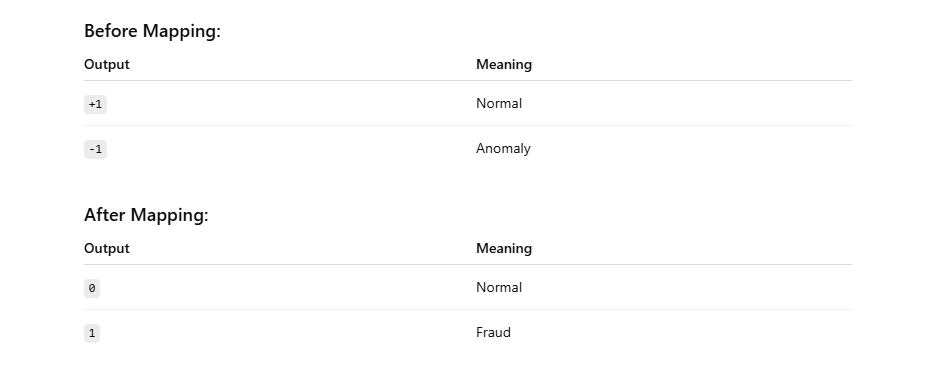

### Step 10: Model Evaluation 

In [967]:
from    sklearn.metrics          import accuracy_score, confusion_matrix, classification_report

Y

0       0
1       0
2       0
3       0
4       0
       ..
9995    0
9996    0
9997    0
9998    0
9999    0
Name: Class, Length: 10000, dtype: int64

In [968]:
df["IF_Pred"]

0       0
1       0
2       0
3       0
4       0
       ..
9995    0
9996    0
9997    0
9998    0
9999    0
Name: IF_Pred, Length: 10000, dtype: int64

In [969]:
ac = accuracy_score(Y,df["IF_Pred"])

print("Accuracy of the model is:", (ac * 100.0))

Accuracy of the model is: 99.67


In [970]:
cm = confusion_matrix(Y,df["IF_Pred"])

print("Confusion matrix of the model is:", (cm))

Confusion matrix of the model is: [[9967   17]
 [  16    0]]


In [971]:
cr = classification_report(Y,df["IF_Pred"])

print("Classification Report of the model is:", (cr))

Classification Report of the model is:               precision    recall  f1-score   support

           0       1.00      1.00      1.00      9984
           1       0.00      0.00      0.00        16

    accuracy                           1.00     10000
   macro avg       0.50      0.50      0.50     10000
weighted avg       1.00      1.00      1.00     10000



In [972]:
ac = accuracy_score(Y,df["SVM_Predict"])

print("Accuracy of the model is:", (ac*100.0))



Accuracy of the model is: 99.03


In [973]:
cm = confusion_matrix(Y,df["SVM_Predict"])

print("Confusion matrix of the model is:", (cm))


Confusion matrix of the model is: [[9903   81]
 [  16    0]]


In [974]:
cr = classification_report(Y,df["SVM_Predict"])

print("Classification report of the model is:", (cr))


Classification report of the model is:               precision    recall  f1-score   support

           0       1.00      0.99      1.00      9984
           1       0.00      0.00      0.00        16

    accuracy                           0.99     10000
   macro avg       0.50      0.50      0.50     10000
weighted avg       1.00      0.99      0.99     10000



### Step 11:  Visualization 


## (a)   Visualization using Isolation Forest

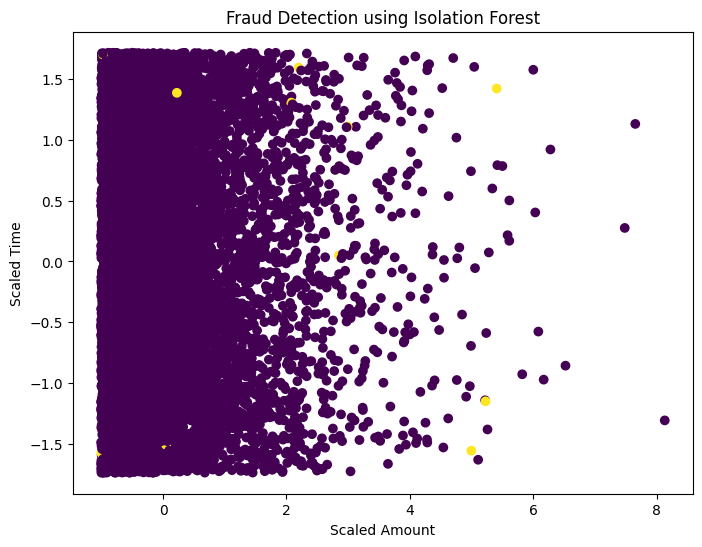

In [975]:

plt.figure(figsize=(8,6))
### perform the scatter plot for the Isolation Forest
plt.scatter(
    df["scaled_Amount"]            ,
    df["scaled_Time"]              ,
    c = df["IF_Pred"]
)

plt.title("Fraud Detection using Isolation Forest")
plt.xlabel("Scaled Amount")
plt.ylabel("Scaled Time")
plt.show()

## (a)   Visualization using one Class SVM

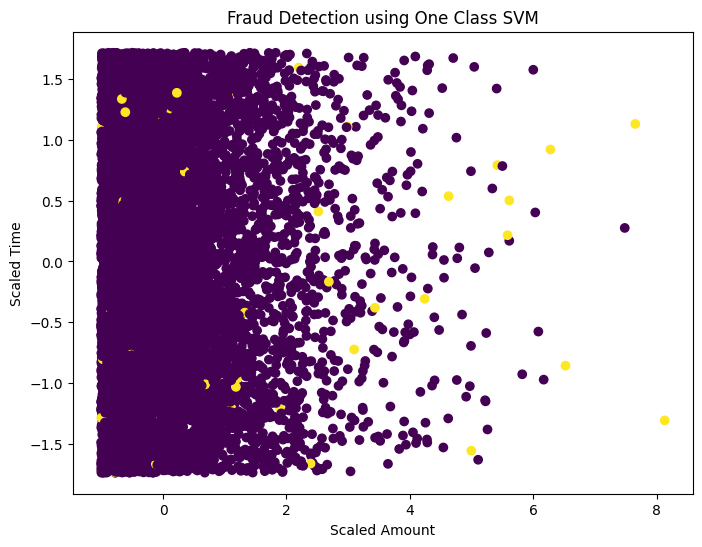

In [976]:
plt.figure(figsize=(8,6))

### perform the scatter plot for the SVM 

plt.scatter(
    df["scaled_Amount"]                  ,
    df["scaled_Time"]                    ,
    c = df["SVM_Predict"]
)


plt.title("Fraud Detection using One Class SVM")
plt.xlabel("Scaled Amount")
plt.ylabel("Scaled Time")
plt.show()

### OBSERVATIONS:

1. From the above two graphs, it is concluded that the number of anamolies detected using One Class SVM is much more in number than the Isolation Forest.